In [91]:
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
answer = "for reference a typical wellengineered decoder you might submit should converge accurately within at most a few minutes. nevertheless we will allow each student submission up to hour of run time to avoid unduly penalizing inefficient but otherwise good implementations. this is the time allotted per student to start the program and call the function for all of the ciphertexts one at a time. hence if your decoder doesnt have a built in stopping criterion it will terminate after an hour and the deciphered text in the output file or files if some ciphertexts have finished at that point will be used."
ciphertext = "ybpkp y p ft kskeovjtsgkq gg fajf  p uku tbu pkobwkdjazek.wcdjek.zbwguktbfh pa ksttwpse gokqjezjfksekdb.eksky qkdjfwe .xkf h pez g ..kq kqjggksggbqk stzk.ewu fek.wcdj..jbfkwvkebkzbwpkbykpwfkejd kebkshbjukwfuwgokv fsgjljfakjf yyjtj fekcwekbez pqj. kabbukjdvg d fesejbf.xkezj.kj.kez kejd ksggbee ukv pk.ewu fekebk.espekez kvpbapsdksfuktsggkez kywftejbfkybpksggkbykez ktjvz pe ne.kbf ksekskejd xkz ft kjykobwpku tbu pkub .fekzsh kskcwjgekjfk.ebvvjfaktpje pjbfkjekqjggke pdjfse ksye pksfkzbwpksfukez ku tjvz p uke nekjfkez kbwevwekyjg kbpkyjg .kjyk.bd ktjvz pe ne.kzsh kyjfj.z uksekezsekvbjfekqjggkc kw. ux"
ciphertext_breakpoint = "igsrstitstnltrerda clevrftvvtn.cnttstjrjtlgjtsragzrpc.udrqzmpcdrqugzvjrlgnxts.trellzsedtvarfcducnredrpgqdreritfrpcnzdtqhrntxtsdutvtqqrftrfcvvrevvgfrtelurqdzjtndrqzmpcqqcgnrz rdgrugzsrgirsznrdcptrdgrexgcjrznjzvar tnevcocn.rcntiiclctndrmzdrgdutsfcqtr.ggjrcp vtptndedcgnqhrducqrcqrdutrdcptrevvgddtjr tsrqdzjtndrdgrqdesdrdutr sg.seprenjrlevvrdutriznldcgnrigsrevvrgirdutrlc utsdtydqrgntredjzjusd ljp be jsgjakrmjt ekt mjtk fbujpz. jzjcrsvujsbjfukiisbojemsu mskbjsujhsvvju mdsbzu jzgu mjzbjpkrmjzbtjup jt esip m tju xujsbjup jkruirujgsv jkmjgsv fjsgjfkd jesip mu xufjpz. jgsbsfp tjzujupzujiksbujhsvvjc jrf tl"

In [100]:
with open("data/plaintext_warandpeace.txt", "r") as f:
    answer = f.readline().replace("\n", "").replace("\r", "")
with open("data/ciphertext_warandpeace.txt", "r") as f:
    ciphertext = f.readline().replace("\n", "").replace("\r", "")

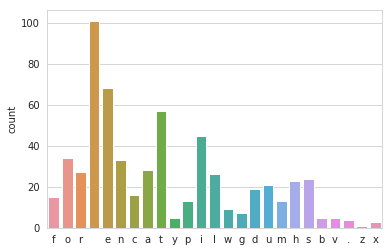

In [6]:
sns.countplot(list(answer))

In [113]:
def exchangeit(content, a, b):
    content = content.replace(a, "@")
    content = content.replace(b, a)
    content = content.replace("@", b)
    return content

In [114]:
def shortdecode(ciphertext):
    # " " is the frequentest
    # "the" is the most common 3gram
    
    content = ciphertext

    fixed_plain = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
                         's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.']
    
    # " "
    space = max(set(list(ciphertext)), key=list(ciphertext).count)
    content = exchangeit(content, " ", space)
    fixed_plain.remove(" ")
    print(space, "-> ")

    # "a"
    words = content.split(" ")
    gram1 = [x for x in words if len(x)==1]
    a = max(set(gram1), key=gram1.count)
    content = exchangeit(content, "a", a)
    fixed_plain.remove("a")
    print(a, "->a")
    
    # "the"
    gram3 = [x for x in words if len(x)==3 and len(set(list(x)))==3]
    the = max(set(gram3), key=gram3.count)
    content = exchangeit(content, "t", the[0])
    content = exchangeit(content, "h", the[1])
    content = exchangeit(content, "e", the[2])
    fixed_plain.remove("t");fixed_plain.remove("h");fixed_plain.remove("e")
    print(the, "->the")
    
    # "."
    d = collections.Counter()
    dot_candidate1 = set([content[i] for i, x in enumerate(list(content[1:])) if x == " "]) # avoid index 0-1
    dot_candidate2 = []
    for dot in dot_candidate1:
        if len(set([content[i+1] for i, x in enumerate(list(content[:-1])) if x == dot]))==1:
            dot_candidate2.append(dot)
    dot = max(set(dot_candidate2), key=dot_candidate2.count)
    content = exchangeit(content, ".", dot)
    fixed_plain.remove(".");
    print(dot, "->.")
    
    words = content.split(" ")
    # will
    will_candidate = [w for w in words if len(w)==4 and w[2]==w[3] and len(set(list(w)))==3 and w[0] in fixed_plain and w[1] in fixed_plain and w[2] in fixed_plain]
    if len(will_candidate)>0:
        will = max(set(will_candidate), key=will_candidate.count)
        content = exchangeit(content, "w", will[0])
        content = exchangeit(content, "i", will[1])
        content = exchangeit(content, "l", will[2])
        fixed_plain.remove("w"); fixed_plain.remove("i"); fixed_plain.remove("l");
        print(will, "->will")
        
        # this
        words = content.split(" ")
        this_candidate = [w for w in words if len(w)==4 and w[:3]=="thi" and w[3] in fixed_plain]
        if len(this_candidate)>0:
            this2 = max(set(this_candidate), key=this_candidate.count)
            content = content.replace("s", "@"); content = content.replace(this2[3], "s"); content = content.replace("@", this2[3])
            fixed_plain.remove("s");
            print(this2, "->this")
            
#             # in
#             words = content.split(" ")
#             in_candidate = [w for w in words if len(w)==2 and w[0]=="i" and w[1] in fixed_plain]
#             if len(in_candidate)>0:
#                 in2 = max(set(in_candidate), key=in_candidate.count)
#                 content = content.replace("n", "@"); content = content.replace(in2[1], "s"); content = content.replace("@", in2[1])
#                 fixed_plain.remove("n");
#                 print(in2, "->in")
            
            # -lized
            words = content.split(" ")
            lized_candidate = [w for w in words if len(w)>5 and w[-5:-3]=="li" and w[-2]=="e" and w[-3] in fixed_plain and w[-1] in fixed_plain and w[-3]!=w[-1]]
            if len(lized_candidate)>0:
                lized = max(set(lized_candidate), key=lized_candidate.count)
                content = content.replace("z", "@"); content = content.replace(lized[-3], "s"); content = content.replace("@", lized[-3])
                content = content.replace("d", "@"); content = content.replace(lized[-1], "d"); content = content.replace("@", lized[-1])
                fixed_plain.remove("z"); fixed_plain.remove("d");
                print(lized[-5:], "->lized")
            
        # with
        words = content.split(" ")
        with_candidate = [w for w in words if len(w)==4 and w[1:]=="ith" and w[0] in fixed_plain]
        if len(with_candidate)>0:
            with2= max(set(with_candidate), key=with_candidate.count)
            content = content.replace("w", "@"); content = content.replace(with2[0], "w"); content = content.replace("@", with2[0])
            fixed_plain.remove("w");
            print(with2, "->with")
    
    # after
    words = content.split(" ")
    after_candidate = [w for w in words if len(w)==5 and w[0]=="a" and w[2]=="t" and w[3]=="e" and w[1]!=w[4] and w[1] in fixed_plain and w[4] in fixed_plain]    
    if len(after_candidate)>0:
        after = max(set(after_candidate), key=after_candidate.count)
        content = content.replace("f", "@"); content = content.replace(after[1], "f"); content = content.replace("@", after[1])
        content = content.replace("r", "@"); content = content.replace(after[4], "r"); content = content.replace("@", after[4])
        fixed_plain.remove("f"); fixed_plain.remove("r")
        print(after, "->after")
        
        # or
        words = content.split(" ")
        or_candidate = [w for w in words if len(w)==2 and w[1]=="r" and w[0] in fixed_plain]
        if len(or_candidate)>0:
            or2 = max(set(or_candidate), key=or_candidate.count)
            content = content.replace("o", "@"); content = content.replace(or2[0], "o"); content = content.replace("@", or2[0])
            fixed_plain.remove("o")
            print(or2, "->or")
        
    
    words = content.split(" ")
    # each
    each_candidate = [w for w in words if len(w)==4 and w[0]=="e" and w[1]=="a" and w[3]=="h" and len(set(list(w)))==4 and w[2] in fixed_plain]
    if len(each_candidate)>0:
        each = max(set(each_candidate), key=each_candidate.count)
        content = content.replace("c", "@"); content = content.replace(each[2], "c"); content = content.replace("@", each[2])
        fixed_plain.remove("c");
        print(each, "->each")
    
    # be
    words = content.split(" ")
    be_candidate = [w for w in words if len(w)==2 and w[1]=="e" and len(set(list(w)))==2 and w[0] in fixed_plain]
    if len(be_candidate)>0:
        be = max(set(be_candidate), key=be_candidate.count)
        content = content.replace("b", "@"); content = content.replace(be[0], "b"); content = content.replace("@", be[0])
        fixed_plain.remove("b")
        print(be, "->be")
    
    
    return content, fixed_plain
print(answer)
shortdecode(ciphertext)

chapter i well prince so genoa and lucca are now just family estates of the buonapartes. but i warn you if you dont tell me that this means war if you still try to defend the infamies and horrors perpetrated by that antichristi really believe he is antichristi will have nothing more to do with you and you are no longer my friend no longer my faithful slave as you call yourself but how do you do i see i have frightened yousit down and tell me all the news. it was in july and the speaker was the wellknown anna pavlovna scherer maid of honor and favorite of the empress marya fedorovna. with these words she greeted prince vasili kuragin a man of high rank and importance who was the first to arrive at her reception. anna pavlovna had had a cough for some days. she was as she said suffering from la grippe grippe being then a new word in st. petersburg used only by the elite. all her invitations without exception written in french and delivered by a scarletliveried footman that morning ran as

('dbhxten i well xnimde ry vemyh hmj lsddh hne myw gsrt chfilz erthter yc tbe usymhxhnter. ust i whnm zys ic zys jymt tell fe tbht tbir fehmr whn ic zys rtill tnz ty jecemj tbe imchfier hmj bynnynr xenxetnhtej uz tbht hmtidbnirti nehllz uelieqe be ir hmtidbnirti will bhqe mytbimv fyne ty jy witb zys hmj zys hne my lymven fz cniemj my lymven fz chitbcsl rlhqe hr zys dhll zysnrelc ust byw jy zys jy i ree i bhqe cnivbtemej zysrit jywm hmj tell fe hll tbe mewr. it whr im gslz hmj tbe rxehoen whr tbe wellomywm hmmh xhqlyqmh rdbenen fhij yc bymyn hmj chqynite yc tbe efxnerr fhnzh cejynyqmh. witb tbere wynjr rbe vneetej xnimde qhrili osnhvim h fhm yc bivb nhmo hmj ifxynthmde wby whr tbe cinrt ty hnniqe ht ben nedextiym. hmmh xhqlyqmh bhj bhj h dysvb cyn ryfe jhzr. rbe whr hr rbe rhij rsccenimv cnyf lh vnixxe vnixxe ueimv tbem h mew wynj im rt. xetenrusnv srej ymlz uz tbe elite. hll ben imqithtiymr witbyst epdextiym wnittem im cnemdb hmj jeliqenej uz h rdhnletliqeniej cyytfhm tbht fynmimv nhm 

In [115]:
plain, free = shortdecode(ciphertext)
for i in range(len(answer)):
    if(answer[i]!=plain[i] and plain[i] not in free):
        print(i, answer[i], plain[i])

e -> 
g ->a
eax ->the
p ->.
piuu ->will
ge ->be
1 h b
2 a h
29 a h
31 a h
39 a h
41 a h
55 a h
64 a h
73 h b
80 a h
82 a h
96 a h
125 h b
126 a h
130 h b
136 a h
141 a h
172 h b
178 a h
184 a h
188 h b
203 a h
212 h b
213 a h
216 a h
221 h b
230 a h
243 h b
249 a h
254 h b
266 h b
267 a h
274 h b
293 h b
299 a h
307 a h
345 a h
348 h b
355 a h
359 a h
367 a h
384 h b
406 h b
407 a h
415 h b
434 a h
446 a h
451 h b
464 a h
475 a h
480 h b
486 a h
492 a h
496 h b
509 a h
512 a h
515 a h
521 a h
525 h b
532 a h
539 h b
545 a h
550 a h
562 h b
574 a h
577 a h
587 a h
593 h b
596 h b
608 h b
627 a h
636 a h
641 a h
644 a h
650 h b
653 h b
656 a h
660 a h
670 a h
676 h b
680 a h
684 h b
696 a h
703 a h
706 h b
721 a h
724 a h
727 a h
733 a h
735 h b
736 a h
739 h b
740 a h
743 a h
749 h b
761 a h
767 h b
771 a h
774 a h
778 h b
782 a h
802 a h
825 h b
829 a h
872 h b
882 a h
886 h b
895 a h
905 h b
936 h b
938 a h
955 a h
959 a h
978 a h
982 h b
983 a h
995 a h
998 a h
1016 h b
1017 a h
1024

8498 a h
8505 h b
8533 h b
8538 h b
8542 a h
8547 h b
8562 a h
8565 a h
8574 a h
8578 a h
8581 a h
8585 a h
8589 a h
8595 h b
8596 a h
8602 a h
8609 h b
8610 a h
8614 h b
8632 h b
8640 h b
8650 a h
8659 a h
8669 h b
8689 a h
8694 a h
8703 a h
8705 a h
8710 a h
8715 h b
8718 a h
8723 h b
8742 h b
8748 a h
8771 a h
8774 a h
8776 h b
8781 h b
8798 h b
8816 a h
8818 h b
8827 h b
8830 a h
8834 a h
8837 a h
8840 a h
8846 a h
8872 a h
8881 a h
8884 h b
8891 a h
8895 a h
8906 a h
8915 a h
8927 h b
8928 a h
8935 h b
8943 a h
8948 h b
8952 a h
8975 h b
8986 h b
8987 a h
8996 a h
9001 h b
9002 a h
9008 h b
9018 a h
9040 a h
9047 h b
9054 h b
9058 a h
9084 h b
9094 a h
9110 a h
9117 a h
9128 a h
9131 a h
9134 a h
9140 a h
9147 a h
9153 h b
9154 a h
9169 h b
9173 h b
9180 a h
9199 a h
9206 a h
9208 a h
9215 h b
9218 a h
9226 h b
9231 a h
9239 a h
9244 h b
9245 a h
9249 a h
9252 a h
9255 a h
9262 a h
9265 h b
9267 a h
9273 a h
9278 h b
9282 h b
9297 h b
9298 a h
9303 a h
9320 a h
9334 a h
9351 h b
9

15521 h b
15527 h b
15533 a h
15562 h b
15574 a h
15587 a h
15597 a h
15605 a h
15611 a h
15614 a h
15617 a h
15621 h b
15627 h b
15638 h b
15648 a h
15653 a h
15670 h b
15675 a h
15680 a h
15689 h b
15694 a h
15699 h b
15704 h b
15708 a h
15726 h b
15730 h b
15732 h b
15736 a h
15743 a h
15750 a h
15752 h b
15764 h b
15765 a h
15769 h b
15774 h b
15786 h b
15794 h b
15798 a h
15817 h b
15818 a h
15836 h b
15847 h b
15851 h b
15854 h b
15867 a h
15871 a h
15876 a h
15880 a h
15895 h b
15898 h b
15910 h b
15914 h b
15941 h b
15942 a h
15947 a h
16006 a h
16016 a h
16026 a h
16032 a h
16036 a h
16039 a h
16042 a h
16048 a h
16053 h b
16054 a h
16061 a h
16064 a h
16066 a h
16074 a h
16082 h b
16084 h b
16088 a h
16093 a h
16097 h b
16110 h b
16117 h b
16143 h b
16163 a h
16191 a h
16202 a h
16205 h b
16215 h b
16224 h b
16229 a h
16236 h b
16239 a h
16244 h b
16257 h b
16279 h b
16281 a h
16286 a h
16297 a h
16303 a h
16311 a h
16315 a h
16319 a h
16323 a h
16329 a h
16332 a h
16335 a h


26325 h b
26329 a h
26345 h b
26346 a h
26350 a h
26352 a h
26365 a h
26379 a h
26383 h b
26384 a h
26394 a h
26397 a h
26400 a h
26406 a h
26409 a h
26416 a h
26437 a h
26447 a h
26454 h b
26459 a h
26462 a h
26465 h b
26469 h b
26483 a h
26490 a h
26496 h b
26501 a h
26504 a h
26509 a h
26517 a h
26524 h b
26525 a h
26531 a h
26535 a h
26543 a h
26558 a h
26570 a h
26595 h b
26596 a h
26601 a h
26607 h b
26612 h b
26630 h b
26641 a h
26650 h b
26651 a h
26661 h b
26670 a h
26679 h b
26686 a h
26702 h b
26724 a h
26733 h b
26757 h b
26760 h b
26764 h b
26765 a h
26769 h b
26770 a h
26774 h b
26777 h b
26802 h b
26803 a h
26808 h b
26809 a h
26821 h b
26822 a h
26834 h b
26843 h b
26850 a h
26855 a h
26859 h b
26876 h b
26879 a h
26884 a h
26898 a h
26902 a h
26905 a h
26908 a h
26914 a h
26917 h b
26947 h b
26963 a h
26974 h b
26978 h b
26988 h b
26992 a h
27007 h b
27008 a h
27023 h b
27027 a h
27031 h b
27052 h b
27057 a h
27075 a h
27093 h b
27112 h b
27116 a h
27121 h b
27125 a h


37627 h b
37637 a h
37643 a h
37650 a h
37655 h b
37658 a h
37666 a h
37670 h b
37671 a h
37674 a h
37678 a h
37698 a h
37700 a h
37719 h b
37726 a h
37728 a h
37737 h b
37741 a h
37745 h b
37746 a h
37758 h b
37772 h b
37785 a h
37796 a h
37800 h b
37841 h b
37846 a h
37851 a h
37863 h b
37884 a h
37886 a h
37891 h b
37892 a h
37896 a h
37906 a h
37919 a h
37929 h b
37931 a h
37934 a h
37937 a h
37954 a h
37966 h b
37967 a h
37970 h b
37987 h b
37998 a h
38003 a h
38006 a h
38013 h b
38020 a h
38025 a h
38028 h b
38033 h b
38037 h b
38042 h b
38055 a h
38058 h b
38066 h b
38073 h b
38078 h b
38082 a h
38084 h b
38100 h b
38129 a h
38146 a h
38152 a h
38155 h b
38168 a h
38170 a h
38183 a h
38211 a h
38216 h b
38217 a h
38224 a h
38229 h b
38259 h b
38264 a h
38267 h b
38271 a h
38288 a h
38306 h b
38311 a h
38324 h b
38336 a h
38343 h b
38357 h b
38370 h b
38379 a h
38383 a h
38388 a h
38399 a h
38403 h b
38407 a h
38410 a h
38412 h b
38436 h b
38458 a h
38461 a h
38464 a h
38470 a h


48937 a h
48942 a h
48962 h b
48973 h b
48977 a h
48989 h b
48994 a h
48996 h b
49001 a h
49026 a h
49031 h b
49035 a h
49056 a h
49060 a h
49069 a h
49077 h b
49092 a h
49099 h b
49103 a h
49107 a h
49112 h b
49119 a h
49134 h b
49145 a h
49148 h b
49154 a h
49161 a h
49166 a h
49169 h b
49182 h b
49189 h b
49192 a h
49204 h b
49216 h b
49220 h b
49223 h b
49224 a h
49240 a h
49244 h b
49260 h b
49265 a h
49270 h b
49281 h b
49282 a h
49290 a h
49295 h b
49310 h b
49324 h b
49328 a h
49332 a h
49398 h b
49400 a h
49404 h b
49415 h b
49426 h b
49439 h b
49460 a h
49463 h b
49485 a h
49489 a h
49501 h b
49502 a h
49509 a h
49527 a h
49543 h b
49563 h b
49571 h b
49575 a h
49580 h b
49581 a h
49600 h b
49609 h b
49618 h b
49621 a h
49629 a h
49634 a h
49637 h b
49640 h b
49661 a h
49663 a h
49667 a h
49671 a h
49676 h b
49681 a h
49684 h b
49690 a h
49694 a h
49708 a h
49715 h b
49716 a h
49720 h b
49728 a h
49732 a h
49738 a h
49749 a h
49756 h b
49764 h b
49770 h b
49771 a h
49782 h b


56355 h b
56367 a h
56371 a h
56375 a h
56396 a h
56400 a h
56410 a h
56417 h b
56418 a h
56428 a h
56437 a h
56445 a h
56453 h b
56460 h b
56461 a h
56466 h b
56467 a h
56483 h b
56484 a h
56487 h b
56488 a h
56510 a h
56524 h b
56528 a h
56531 a h
56535 h b
56536 a h
56557 h b
56572 a h
56575 a h
56586 a h
56594 a h
56604 h b
56605 a h
56627 a h
56635 a h
56639 a h
56642 h b
56645 a h
56648 a h
56652 a h
56658 a h
56674 h b
56675 a h
56679 h b
56688 h b
56703 h b
56719 h b
56730 h b
56747 a h
56758 a h
56764 a h
56772 a h
56775 h b
56790 a h
56804 h b
56805 a h
56815 h b
56816 a h
56827 h b
56830 a h
56860 a h
56871 a h
56892 h b
56893 a h
56897 a h
56911 h b
56914 h b
56915 a h
56936 a h
56945 a h
56949 a h
56954 a h
56957 h b
56972 a h
56977 h b
56986 a h
56990 a h
56995 a h
56997 h b
57002 h b
57015 h b
57027 a h
57037 a h
57041 h b
57047 h b
57055 a h
57059 a h
57064 a h
57069 a h
57080 h b
57090 a h
57134 a h
57142 a h
57162 h b
57163 a h
57180 a h
57191 a h
57210 a h
57234 a h


68354 a h
68360 a h
68396 a h
68410 h b
68415 a h
68417 a h
68423 a h
68429 a h
68433 h b
68448 h b
68464 h b
68469 a h
68472 h b
68481 h b
68490 h b
68492 a h
68496 h b
68497 a h
68501 a h
68508 a h
68513 a h
68532 a h
68539 h b
68552 h b
68559 a h
68570 h b
68579 a h
68586 a h
68594 a h
68596 a h
68602 a h
68619 h b
68624 a h
68637 h b
68641 h b
68647 h b
68655 h b
68656 a h
68660 a h
68667 h b
68680 h b
68684 a h
68687 a h
68710 a h
68717 a h
68732 h b
68747 a h
68749 h b
68756 h b
68757 a h
68760 h b
68768 h b
68771 h b
68790 a h
68799 h b
68804 a h
68809 a h
68815 a h
68827 h b
68840 h b
68841 a h
68848 h b
68858 a h
68861 a h
68882 h b
68896 h b
68916 a h
68919 h b
68920 a h
68930 a h
68952 h b
68970 a h
68979 h b
69011 a h
69023 a h
69035 h b
69054 h b
69061 h b
69064 h b
69073 h b
69080 h b
69083 h b
69120 h b
69138 a h
69149 h b
69152 h b
69155 a h
69187 h b
69192 a h
69202 h b
69207 a h
69210 a h
69213 a h
69221 a h
69227 a h
69231 a h
69256 h b
69260 h b
69262 a h
69264 a h


75425 a h
75438 h b
75452 h b
75463 a h
75472 h b
75486 h b
75487 a h
75495 h b
75496 a h
75510 a h
75537 h b
75561 a h
75565 a h
75569 a h
75577 a h
75588 a h
75617 h b
75618 a h
75622 a h
75639 h b
75654 a h
75662 h b
75666 a h
75674 h b
75676 a h
75689 a h
75709 a h
75717 a h
75740 h b
75752 h b
75759 z a
75763 h b
75770 h b
75774 a h
75783 h b
75787 a h
75801 h b
75802 a h
75815 h b
75822 h b
75826 h b
75831 a h
75863 a h
75865 a h
75869 h b
75874 h b
75875 a h
75879 a h
75883 a h
75887 a h
75889 a h
75897 a h
75901 a h
75907 a h
75925 h b
75942 a h
75975 a h
75979 a h
76004 h b
76031 a h
76041 a h
76054 h b
76060 a h
76064 h b
76068 a h
76071 h b
76075 h b
76080 a h
76094 h b
76098 a h
76119 h b
76129 a h
76136 a h
76140 a h
76154 h b
76165 h b
76172 h b
76173 a h
76189 a h
76201 h b
76212 h b
76215 h b
76216 a h
76245 a h
76247 a h
76250 h b
76253 h b
76254 a h
76267 h b
76276 h b
76277 a h
76284 h b
76307 h b
76321 a h
76324 a h
76327 a h
76333 a h
76345 h b
76349 a h
76356 a h


In [120]:
words = answer.replace(".", "").split(" ")
gram = [w for w in words if len(w)==2]
for i in set(gram):
    print(i, gram.count(i))

in 210
no 44
dr 1
be 68
as 109
la 7
on 111
it 160
us 10
at 103
of 344
is 126
vi 1
am 28
so 62
ma 2
de 5
go 24
iv 1
if 45
up 43
to 477
he 265
xv 1
mi 1
me 59
st 2
an 54
we 11
oh 10
ix 1
th 1
do 45
or 38
by 52
im 4
ii 1
au 3
le 3
il 1
my 47
eh 3
ah 2


In [107]:
ciphertext[:100]

'dagt xneie.xuuetnimdxeryevxmygegmjeusddgegnxemy.ebsr ecgfiuzexr g xreyce axelsymgtgn xrpels eie.gnme'